In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from numpy import column_stack, transpose
from numpy.linalg import inv, matrix_rank
import matplotlib.pyplot as plt
from check_inverse import check_inverse_rank

def linear_reg(X,y,X_new):

    # check for exact soln
    rank_X = matrix_rank(X)
    rank_Xy = matrix_rank(column_stack([X, y]))
    if rank_X == rank_Xy: print("has exact soln")
    else: print("no exact soln, use least sq soln")
    
    if (check_inverse_rank(X.T @ X)):
        # compute weight
        w = inv(transpose(X) @ X) @ transpose(X) @ y
        print(f"w:\n {w}")

        # Predicting for a new input
        yts_pred = X_new @ w
        print(f"pred_y: {yts_pred}")
        
        # find mse(tr)
        ytr_pred = X @ w
        msetr = mean_squared_error(y, ytr_pred)
        print(f"mse (train): {msetr}")
        # find mae(tr)
        maetr = mean_absolute_error(y, ytr_pred)
        print(f"mae (train): {maetr}")

        return ytr_pred
    else:   
        print("X.T @ X not invertible, no soln found")  
        return

has exact soln
matrix rank is : 3
matrix size is : (3, 3)
matrix is invertible
w:
 [[ 5.07894737]
 [-1.76315789]
 [-0.57894737]]
pred_y: [[-9.02631579]]
mse (train): 2.714996282135649e-29
mae (train): 5.1810407815840636e-15


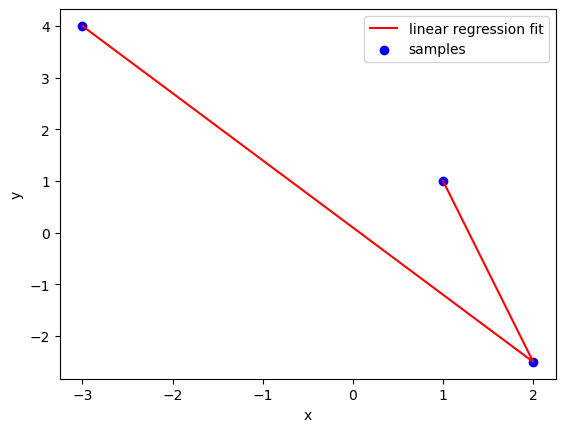

In [11]:
X1 = np.array([[1,4],[2,7],[-3,11]])
X1_bias = np.column_stack([np.ones(X1.shape[0]),X1])
y = np.array([1,-2.5,4]).reshape(-1,1)

X1_new = np.array([[8,0]])
X1_new_bias = np.column_stack([np.ones(X1_new.shape[0]),X1_new])

ytr_pred = linear_reg(X1_bias, y, X1_new_bias)

plt.plot(X1[:,0], ytr_pred, color='r', label = 'linear regression fit')
plt.scatter(X1[:,0], y, color='b', label = 'samples')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()